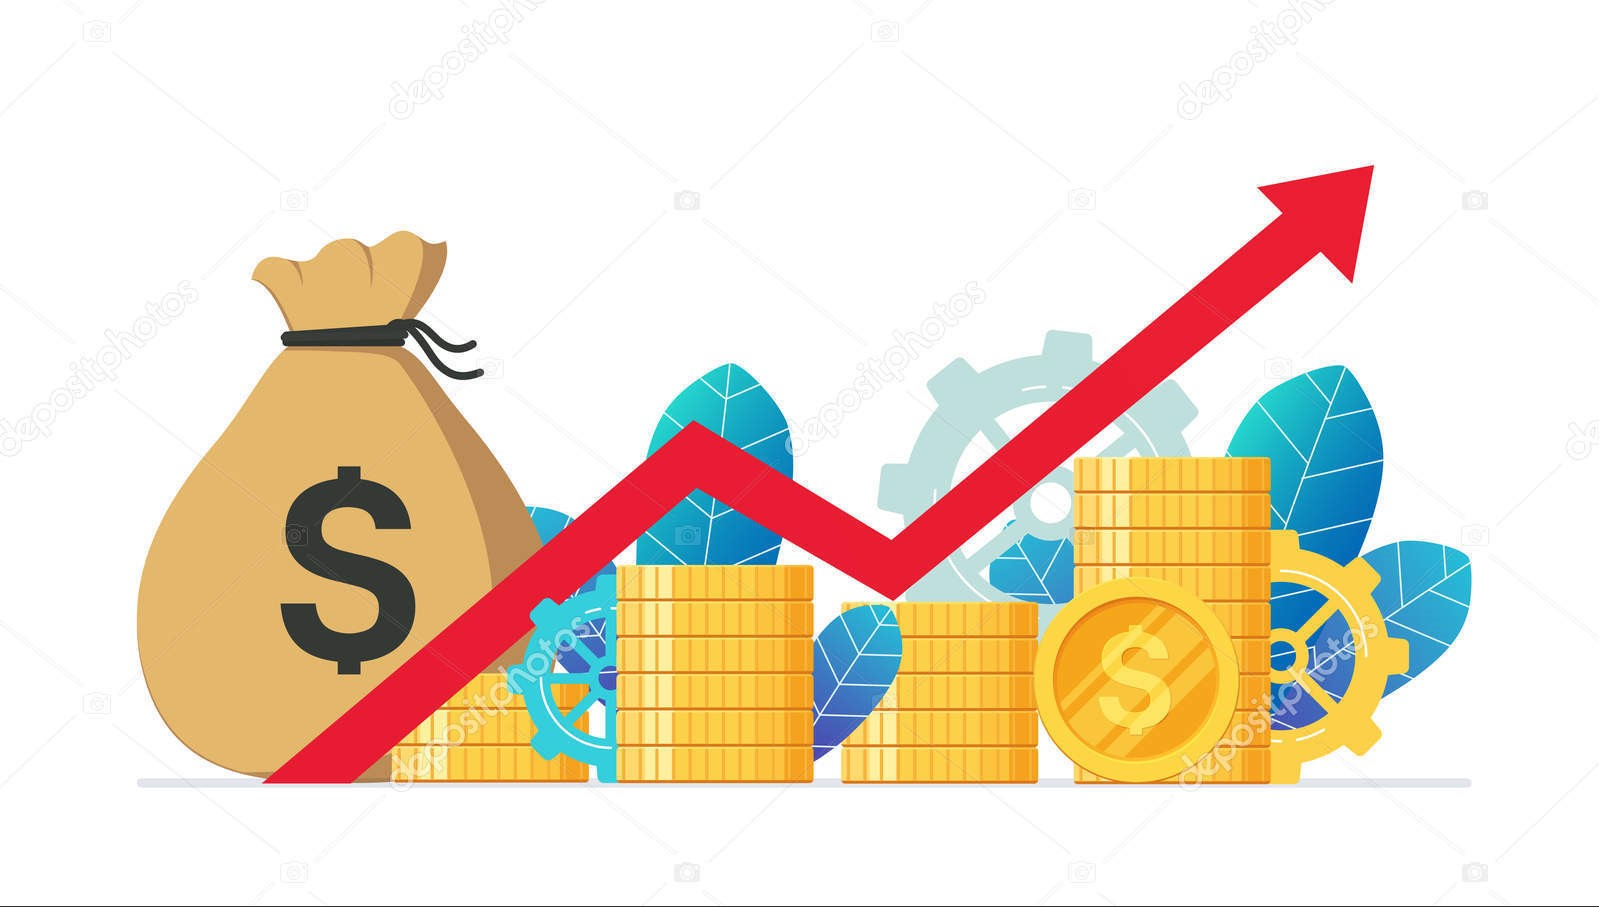

# Aim: The aim is to determine whether a person makes over $50K a year.

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

### Attribute Information:

age: continuous 
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.  
fnlwgt: continuous.  
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.  
education-num: continuous.  
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.  
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.   
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.   
sex: Female, Male.  
capital-gain: continuous.  
capital-loss: continuous.  
hours-per-week: continuous.   
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.  

### Target 
Income: >50K, <=50K.

Import all the required library.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('census_income.csv')

In [3]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
data.shape

(32560, 15)

In [5]:
data.sample(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
11267,32,Private,235109,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
16366,28,Private,278736,5th-6th,3,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
23921,24,Private,206671,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
3311,26,Private,73689,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,55,United-States,<=50K
25881,40,Private,64980,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,Black,Male,0,0,55,United-States,>50K


#### Understanding Columns

In [6]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

Age : Age of Population   
Workclass : Workplace information, where pepole work     
Fnlwgt : sampling weight  
Education : Education level  
Education_num :Number of years of education in total  
Marital_status : Marital_status of population  
Occupation : Occupation of population  
Relationship : Relationship  
Race : race  
Sex : Sex  
Capital_gain : income from investment sources other than salary/wages  
Capital_loss : income from investment sources other than salary/wages  
Hours_per_week : Working Hour per week  
Native_country : Native_country  
Income : Income 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Data Information:

Dataset have 32560 entries, 0 to 32559  
Data having 32560 Rows and 15 columns  
From above information we can say data having 32560 non-null values in all the columns  
But from sample we can see '?' present in some columns. Those columms are Workclass, Occupation, we will check for this also.  
Data having 6 int data type values and 9 object data type.  

#### Checkign null values or wrong entry. 

In [8]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Here we can see data set having all the filled with some values, no null is present.  
Lets check the wrong entries. 

In [9]:
data.isin([" ?"]).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In our data Workclass, Occupation. Native_country are having wrong entries. Lets drop these Rows

In [10]:
data.replace(to_replace=" ?", value=np.nan, inplace= True)

In [11]:
data =data.dropna()
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [12]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

All the value replaced. 

In [13]:
data.sample(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
5246,18,Private,181712,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,12,United-States,<=50K
12705,25,Private,177625,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
18893,26,Private,130931,HS-grad,9,Never-married,Adm-clerical,Own-child,Black,Female,0,0,40,United-States,<=50K
3852,20,Private,189888,12th,8,Never-married,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K
18855,37,Private,201259,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,0,65,United-States,<=50K


### EDA

Lets first seperate categorical and Numerical colums. 

In [14]:
cat_features= data.select_dtypes(include=[np.object])
cat_features.head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


### Univariate Aanalysis

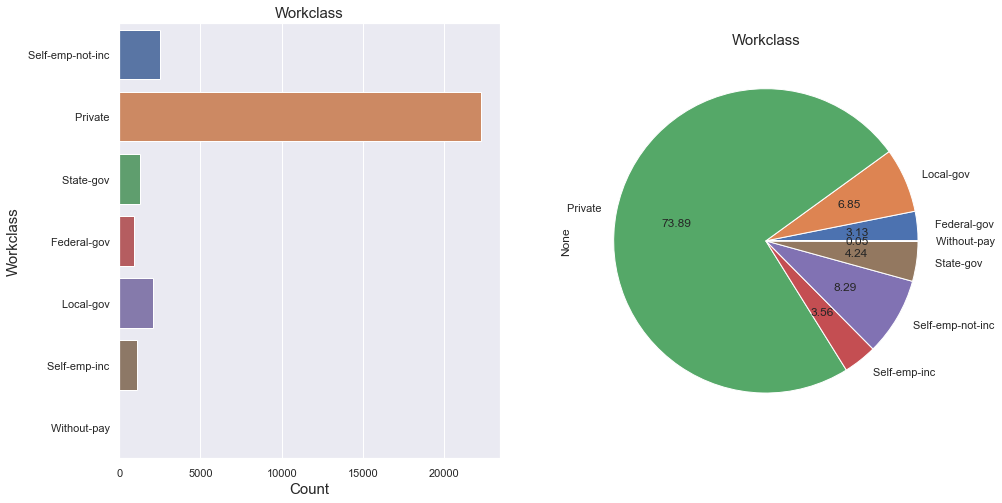

In [15]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(y=cat_features['Workclass'] )
plt.xlabel('Count', fontsize=15 )
plt.ylabel('Workclass', fontsize=15 )
plt.title('Workclass', fontsize=15)
plt.subplot(1,2,2)
cat_features.groupby('Workclass').size().plot(kind='pie', autopct='%.2f')
plt.title('Workclass', fontsize=15)
plt.show()

Here we can see 73.89 percent of the population working in Private sector.

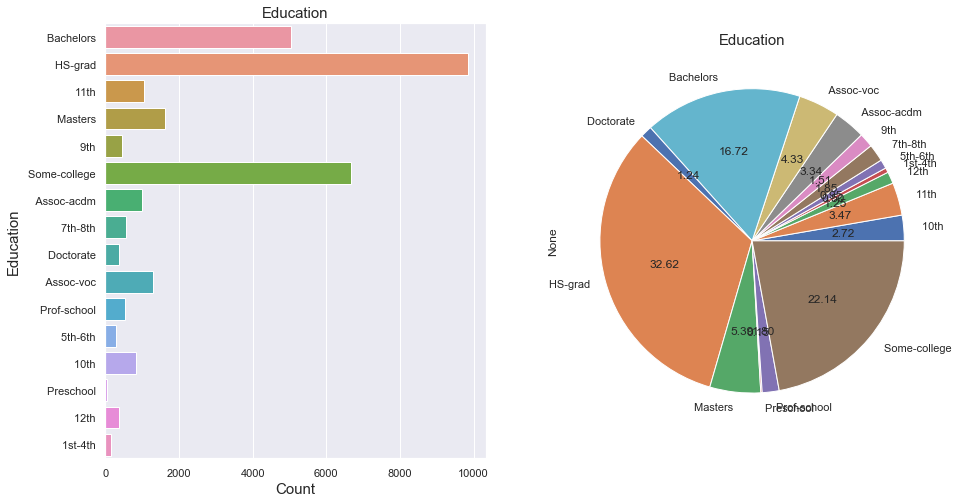

In [16]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.countplot(y=cat_features['Education'])
plt.xlabel('Count', fontsize=15 )
plt.ylabel('Education', fontsize=15 )
plt.title('Education', fontsize=15)

plt.subplot(1,2,2)
cat_features.groupby('Education').size().plot(kind='pie', autopct='%.2f')
plt.title('Education', fontsize=15)
plt.show()

32.62 percent population is HS-grad, only 1.24 percent of the population is doctrate. 

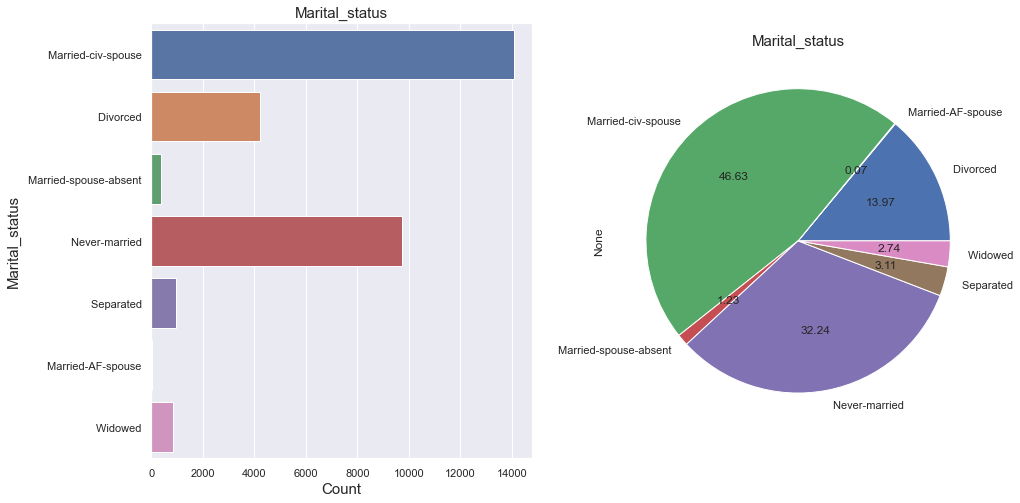

In [17]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.countplot(y=cat_features['Marital_status'] )
plt.xlabel('Count', fontsize=15 )
plt.ylabel('Marital_status', fontsize=15 )
plt.title('Marital_status', fontsize=15)

plt.subplot(1,2,2)
cat_features.groupby('Marital_status').size().plot(kind='pie', autopct='%.2f')
plt.title('Marital_status', fontsize=15)
plt.show()

We can see 46.63 population is married civ spouse, and there is considerable numbers of Never married group.   

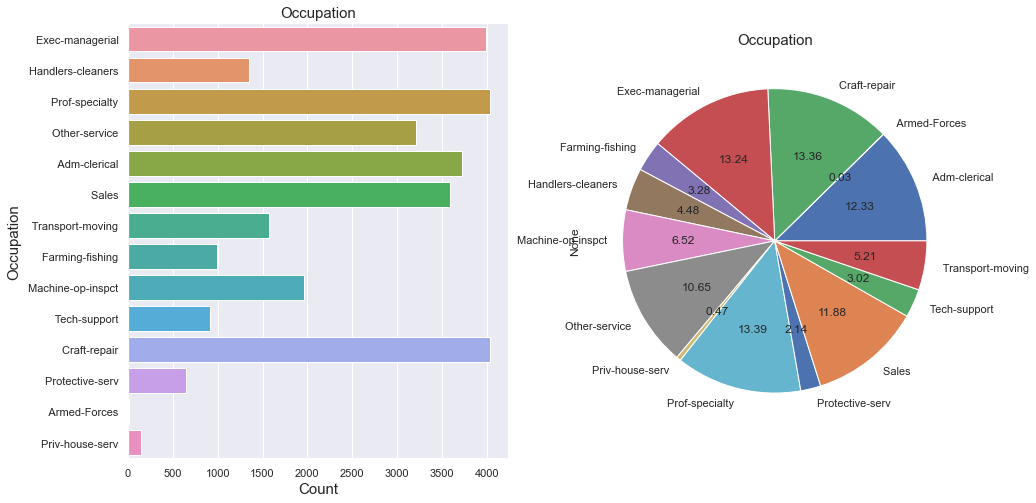

In [18]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.countplot(y=cat_features['Occupation'] )
plt.xlabel('Count', fontsize=15 )
plt.ylabel('Occupation', fontsize=15 )
plt.title('Occupation', fontsize=15)

plt.subplot(1,2,2)
cat_features.groupby('Occupation').size().plot(kind='pie', autopct='%.2f')
plt.title('Occupation', fontsize=15)
plt.show()

Here we can see around 52 percent of the population is at very good posotion.  
This percentage includes Prof-specialty , adm-clerial , Excel Managerial, and craft repair  
Only 0.47 percent of the population is Priv-house servent. 

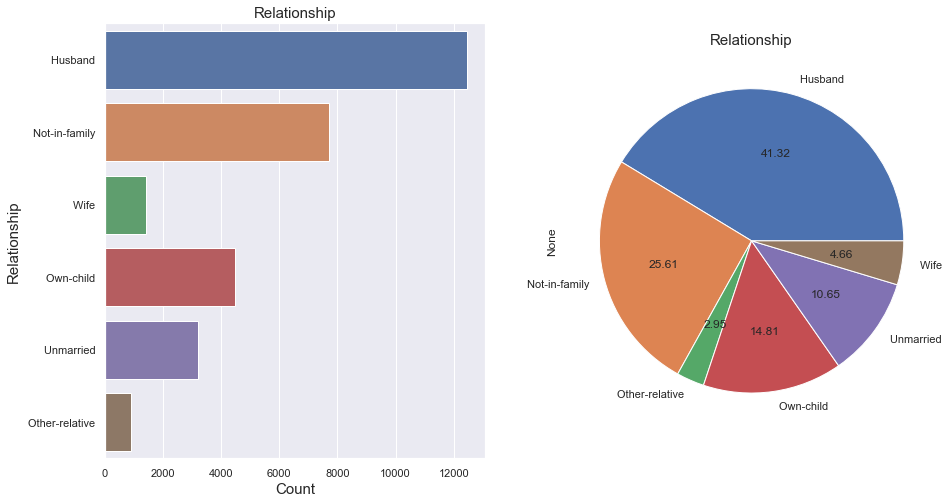

In [19]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.countplot(y=cat_features['Relationship'])
plt.xlabel('Count', fontsize=15 )
plt.ylabel('Relationship', fontsize=15 )
plt.title('Relationship', fontsize=15)

plt.subplot(1,2,2)
cat_features.groupby('Relationship').size().plot(kind='pie', autopct='%.2f')
plt.title('Relationship', fontsize=15)
plt.show()

Here we can see 41.32 percent of the population have relationship as husband, means they are male.  
And 10.65 population is Unmarried. 

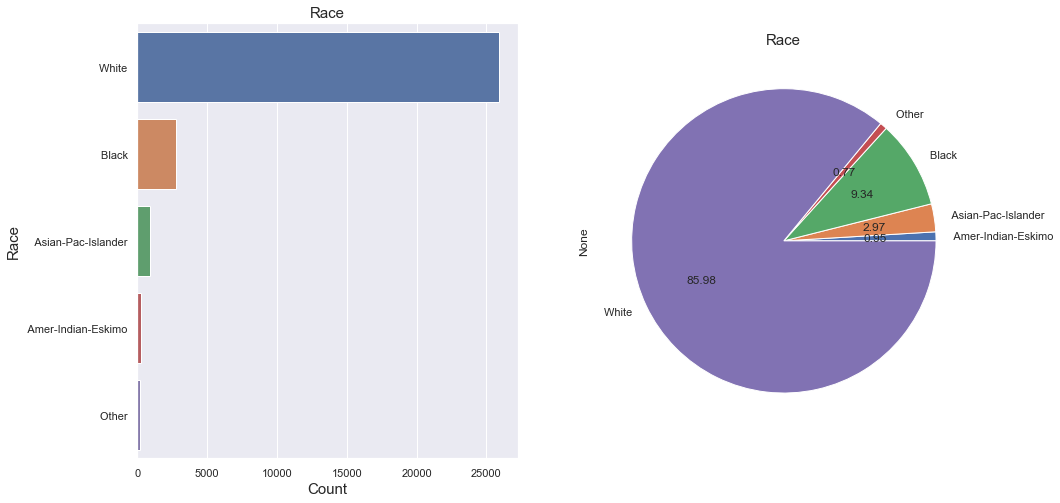

In [20]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.countplot(y=cat_features['Race'])
plt.xlabel('Count', fontsize=15 )
plt.ylabel('Race', fontsize=15 )
plt.title('Race', fontsize=15)

plt.subplot(1,2,2)
cat_features.groupby('Race').size().plot(kind='pie', autopct='%.2f')
plt.title('Race', fontsize=15)
plt.show()

85.98 percent population is White.  
only 9.34 pepole are black. 

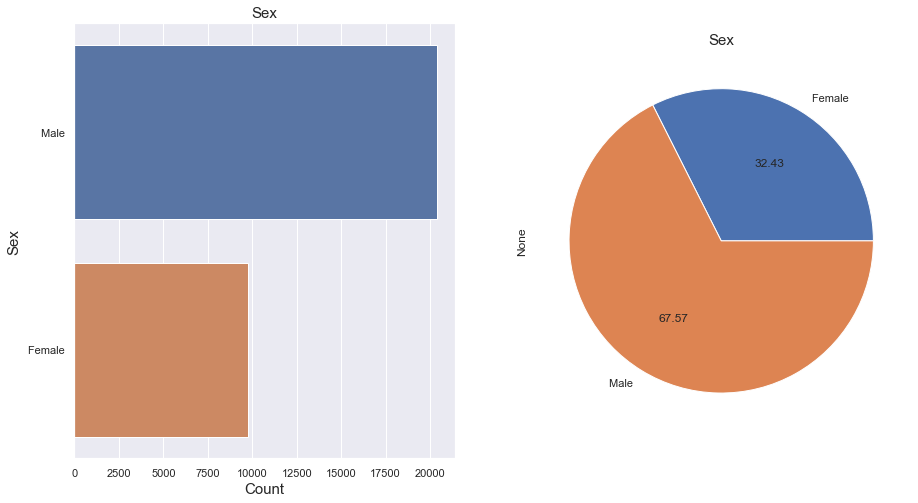

In [21]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.countplot(y=cat_features['Sex'])
plt.xlabel('Count', fontsize=15 )
plt.ylabel('Sex', fontsize=15 )
plt.title('Sex', fontsize=15)

plt.subplot(1,2,2)
cat_features.groupby('Sex').size().plot(kind='pie', autopct='%.2f')
plt.title('Sex', fontsize=15)
plt.show()

We can see 67.57 percent of the population is Male  
It indicatets female workers are less in number.  

Text(0.5, 1.0, 'Native_country')

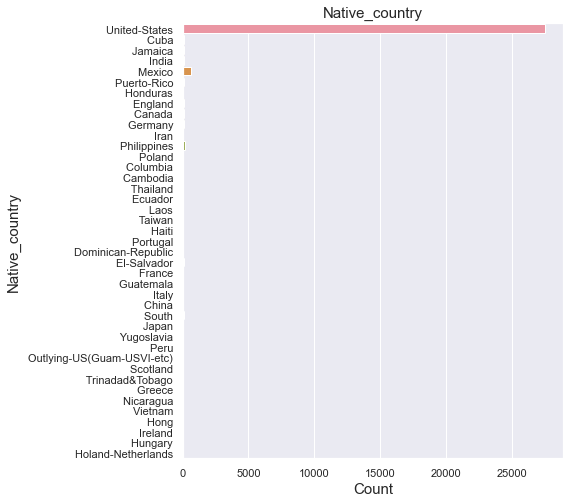

In [22]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.countplot(y=cat_features['Native_country'])
plt.xlabel('Count', fontsize=15 )
plt.ylabel('Native_country', fontsize=15 )
plt.title('Native_country', fontsize=15)

Here we can see more than 95 percent of the populaton is from United-states  
This is becuase the data is collected form US population.  

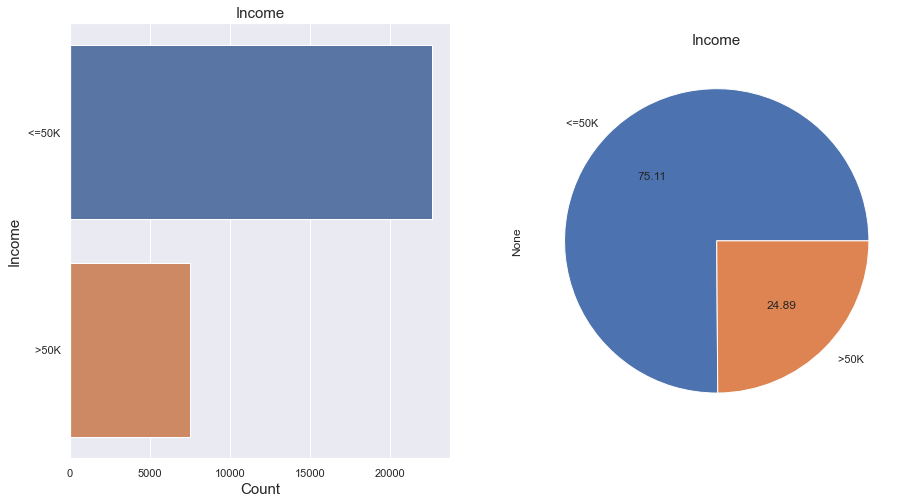

In [23]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.countplot(y=cat_features['Income'])
plt.xlabel('Count', fontsize=15 )
plt.ylabel('Income', fontsize=15 )
plt.title('Income', fontsize=15)

plt.subplot(1,2,2)
cat_features.groupby('Income').size().plot(kind='pie', autopct='%.2f')
plt.title('Income', fontsize=15)
plt.show()

Our Target columns having very good information. 75.11 percent of population have anual income <=50K    
Only 24.89 percentage of pepole are >=50K  

In [24]:
num_features= data.select_dtypes(include=[np.number])

Text(0.5, 1.0, 'Age')

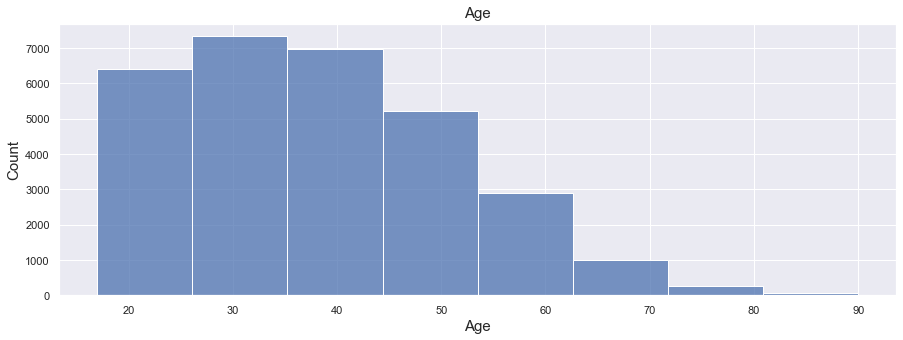

In [25]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,5))

sns.histplot(num_features['Age'], bins= 8)
plt.xlabel('Age', fontsize=15 )
plt.ylabel('Count', fontsize=15 )
plt.title('Age', fontsize=15)


From histogram, we can predict most of The working age of US pupulation is between 20-50   
very few pepole are working in the age above 50.  

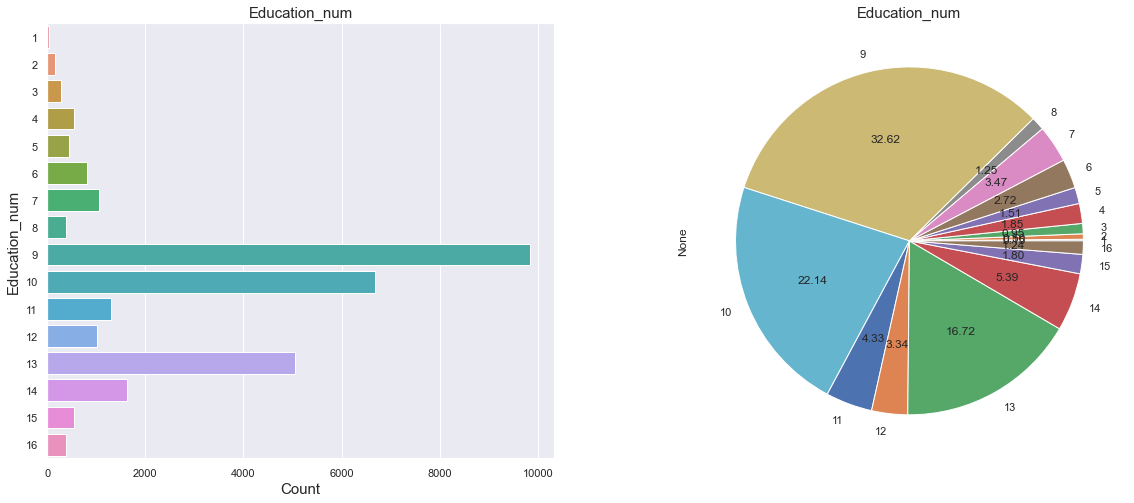

In [26]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(y=num_features['Education_num'])
plt.xlabel('Count', fontsize=15 )
plt.ylabel('Education_num', fontsize=15 )
plt.title('Education_num', fontsize=15)

plt.subplot(1,2,2)
num_features.groupby('Education_num').size().plot(kind='pie', autopct='%.2f')
plt.title('Education_num', fontsize=15)
plt.show()

Education_num indicates number of years of education,  
32.62 percent pepole are having 9 years of education ony,  22.14 are having 10 years education. 
Ppulation with higher education is low. 

Text(0.5, 1.0, 'Capital_gain')

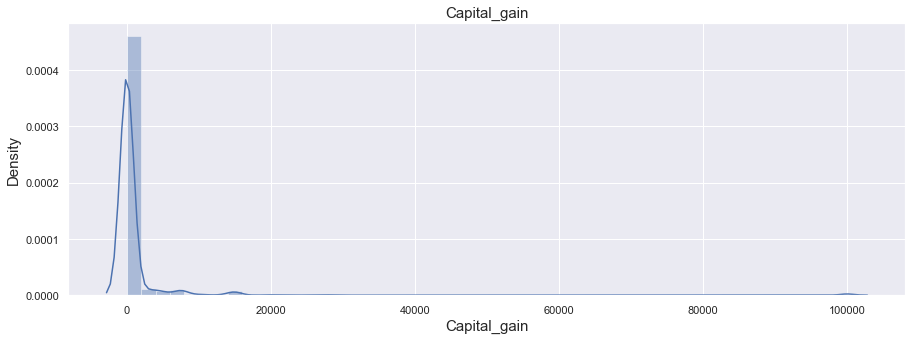

In [27]:
plt.figure(figsize=(15,5))

sns.distplot(num_features['Capital_gain'])
plt.xlabel('Capital_gain', fontsize=15 )
plt.ylabel('Density', fontsize=15 )
plt.title('Capital_gain', fontsize=15)

Probablity for 0 capital gain is very high,   
data having outliers and skewness 

Text(0.5, 1.0, 'Capital_loss')

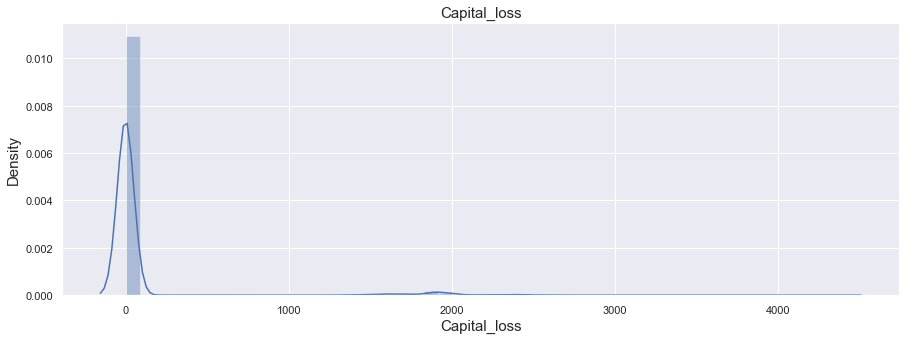

In [28]:
plt.figure(figsize=(15,5))

sns.distplot(num_features['Capital_loss'])
plt.xlabel('Capital_loss', fontsize=15 )
plt.ylabel('Density', fontsize=15 )
plt.title('Capital_loss', fontsize=15)

Probablity for 0 capital loss is very high,   
data having outliers and skewness 

Text(0.5, 1.0, 'Hours_per_week')

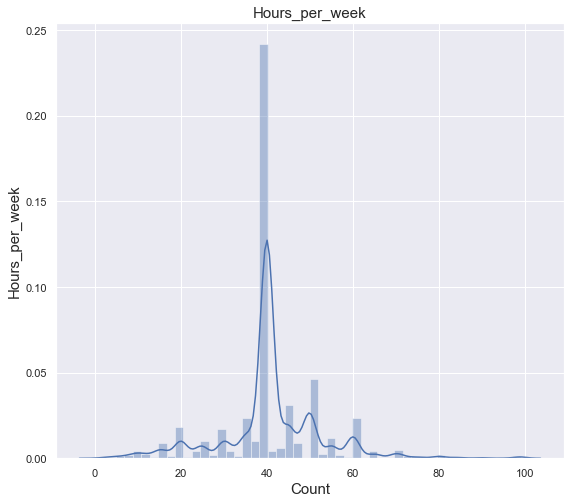

In [29]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(num_features['Hours_per_week'])
plt.xlabel('Count', fontsize=15 )
plt.ylabel('Hours_per_week', fontsize=15 )
plt.title('Hours_per_week', fontsize=15)



We can see probablity of 40 hrs/week is very high.  

### Bivariate Analysis

Here we will analize our data, considering target column,   
We will check how target is effected due to Features columns.

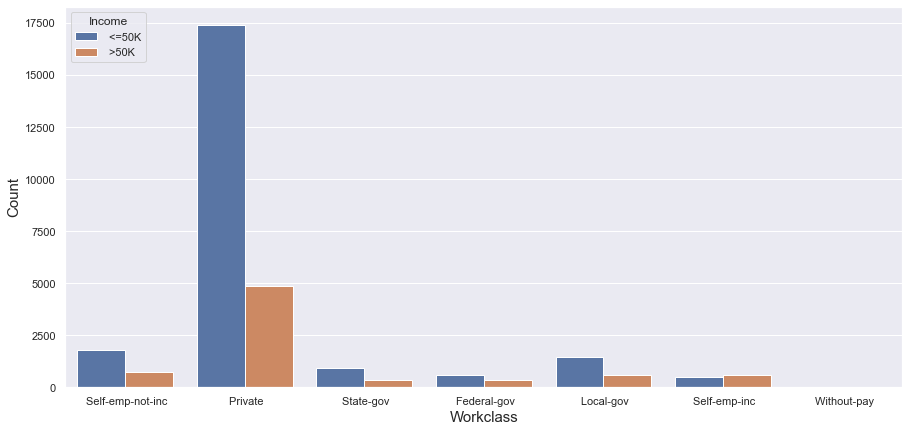

In [30]:
plt.figure(figsize=(15,7))
sns.countplot(data['Workclass'], hue='Income', data= data)
plt.xlabel('Workclass', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()

In [31]:
pd.crosstab(data['Income'], data['Workclass'])

Workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
Income,,,,,,,
<=50K,578,1458,17410,474,1785,934,14
>50K,365,609,4876,600,714,344,0


We have max population working in Private setor whose income income is <=50K per year.   
At same time pepole working in private sector are more as compared to other setcor, whose income is >=50K per year. 

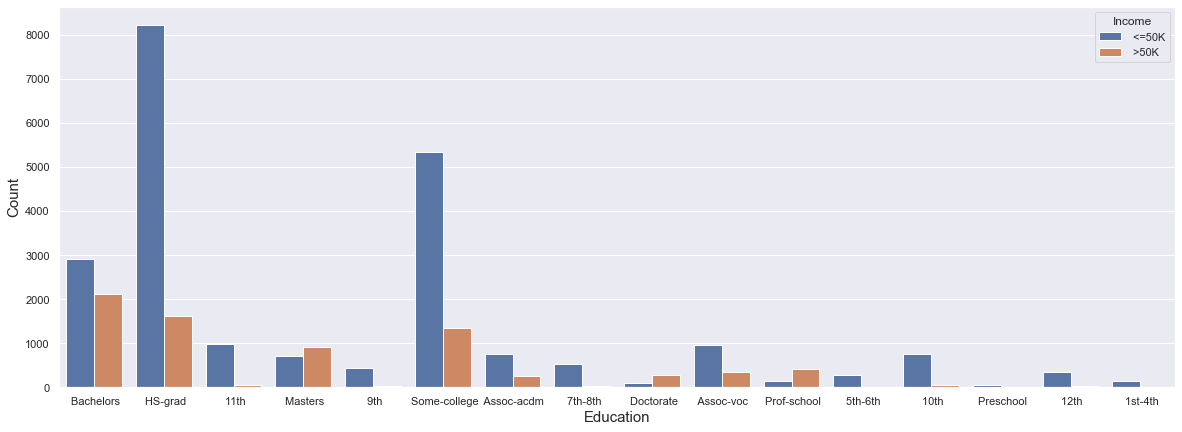

In [32]:
plt.figure(figsize=(20,7))
sns.countplot(data['Education'], hue='Income', data= data)
plt.xlabel('Education', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()

Here the graph indicates that population with higher degree have more chance to have income >=50K  

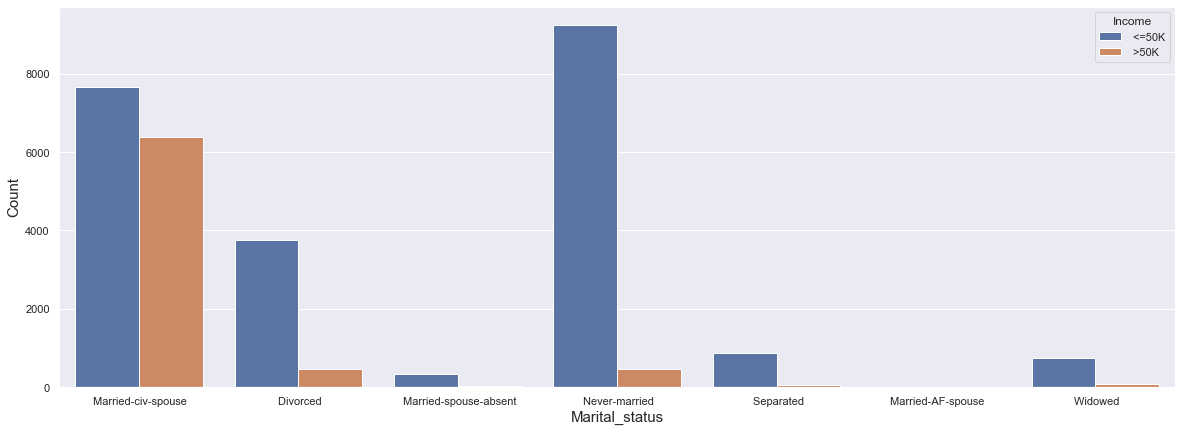

In [33]:
plt.figure(figsize=(20,7))
sns.countplot(data['Marital_status'], hue='Income', data= data)
plt.xlabel('Marital_status', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()

We can see Married civ spouse population is having higher number of Income which >=50k,  as compared to other columns,  
we can say Married civ spouse is having higher possiblity to have income >=50K   
Other category not showing very good relation. 

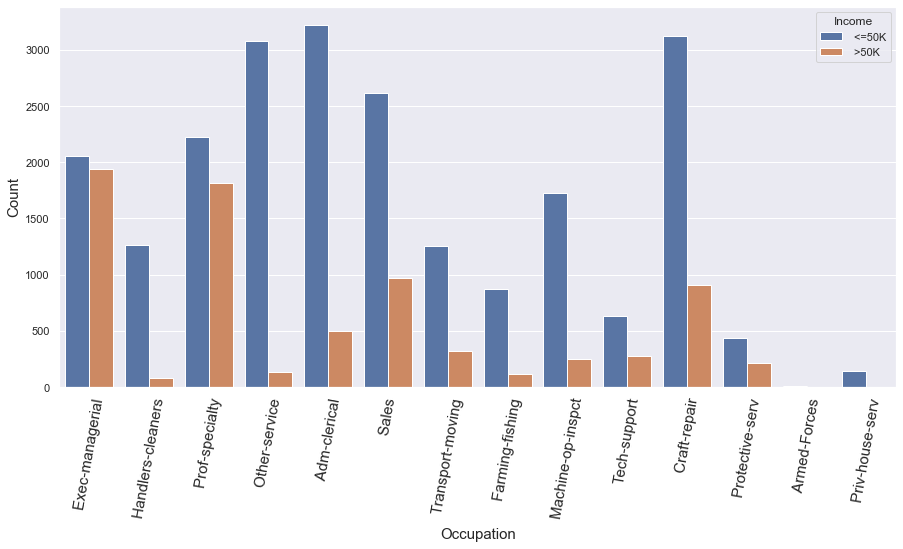

In [34]:
plt.figure(figsize=(15,7))
sns.countplot(data['Occupation'], hue='Income', data= data)
plt.xlabel('Occupation', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
locs, labels = plt.xticks(fontsize= 15)
plt.setp(labels, rotation=80)
plt.show()

Occupation like Exce-managerial and Prof-specialty having higher population with income >=50K.  
In other occupation count is very less for income>=50K  
It indicates occupation have good impact to have income>=50K  

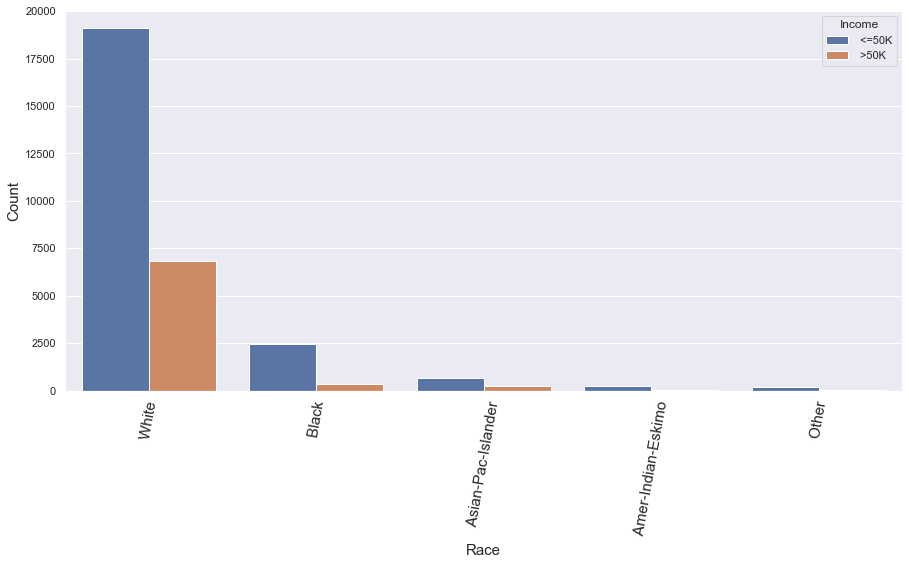

In [35]:
plt.figure(figsize=(15,7))
sns.countplot(data['Race'], hue='Income', data= data)
plt.xlabel('Race', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
locs, labels = plt.xticks(fontsize= 15)
plt.setp(labels, rotation=80)
plt.show()

Here we can see majority of population is White,  so there change of getting income>=50K, Is higher.  

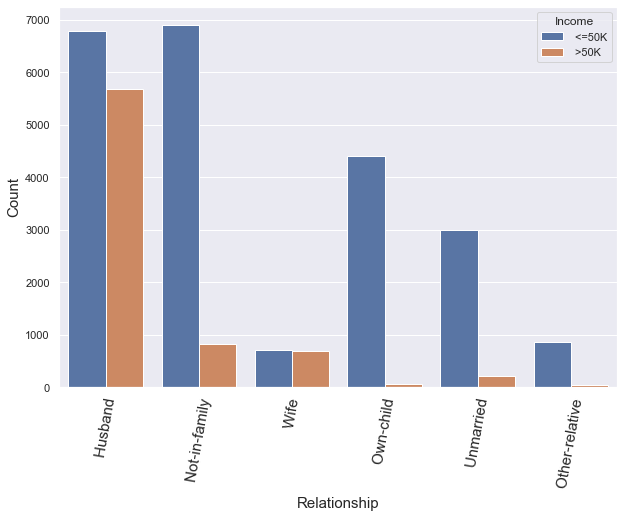

In [36]:
plt.figure(figsize=(10,7))
sns.countplot(data['Relationship'], hue='Income', data= data)
plt.xlabel('Relationship', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
locs, labels = plt.xticks(fontsize= 15)
plt.setp(labels, rotation=80)
plt.show()

Here we can see husband colummn having higher count for income>=50K  
It also indiactes Married man population count is higher than than the unmarried.  

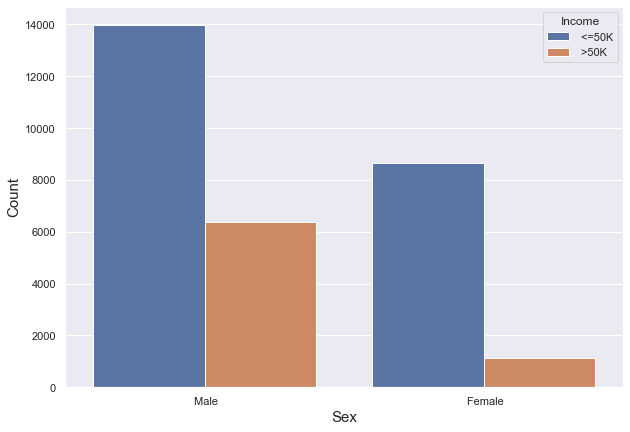

Sex,Female,Male
Income,,
<=50K,8670,13983
>50K,1112,6396


In [37]:
plt.figure(figsize=(10,7))
sns.countplot(data['Sex'], hue='Income', data= data)
plt.xlabel('Sex', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()
pd.crosstab(data['Income'], data['Sex'])

We can see Male population is having highher count as compared to Female, for income>=50K  

before startng with visualisation of numerical data. lets firt encode the Target column.  
we will use LabelEncoder.  

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Income']=le.fit_transform(data['Income'])

Here we can see number as most of the population in working with income<=50.  

<AxesSubplot:xlabel='Age', ylabel='Density'>

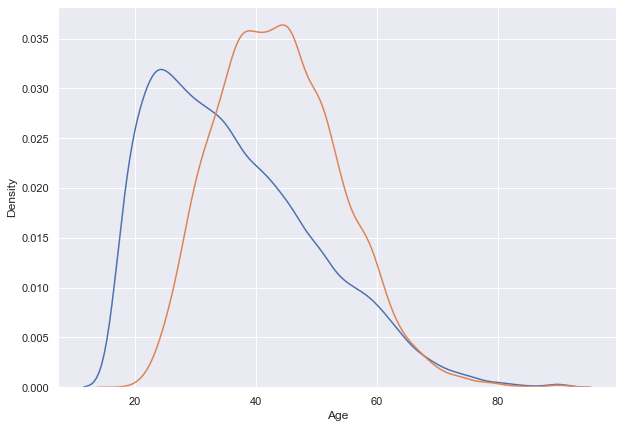

In [39]:
plt.figure(figsize=(10,7))
sns.distplot(data[data['Income']==0]['Age'], hist=False)
sns.distplot(data[data['Income']==1]['Age'], hist=False )

Here we can see initially when the age is less, probablity of having income <=50K is High.  
As age increases the probablity of having income >=50K is is increasing, it is high at age of 40-50

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

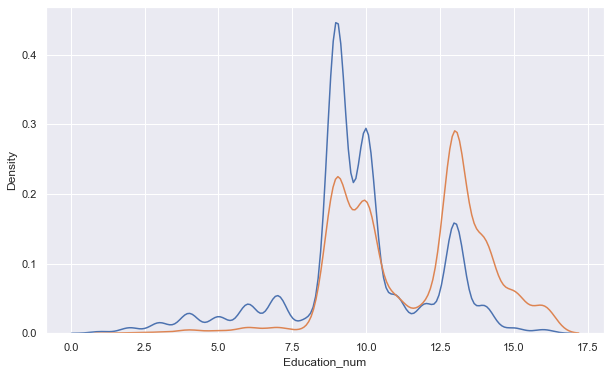

In [40]:
plt.figure(figsize=(10,6))
sns.distplot(data[data['Income']==0]['Education_num'], hist=False )
sns.distplot(data[data['Income']==1]['Education_num'], hist=False )

Here we can clearly see with increase in the number of Education chance of having income>=50K is high.  
At point where education_num >12.5, we cans see drastic chaneg in the  population with income>=50K. 

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

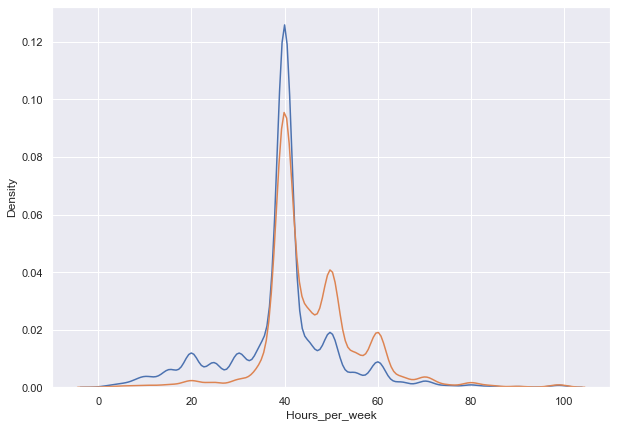

In [41]:
plt.figure(figsize=(10,7))
sns.distplot(data[data['Income']==0]['Hours_per_week'], hist=False )
sns.distplot(data[data['Income']==1]['Hours_per_week'], hist=False )

We can see Initialy the population with income<=50K is high as compare to population with income >=50K. 
But the graph changes with workign hours >50,  we can see increse in the population having income>=50   
This might be due to extra workign hours.(overtime)

### Multivarite Analysis

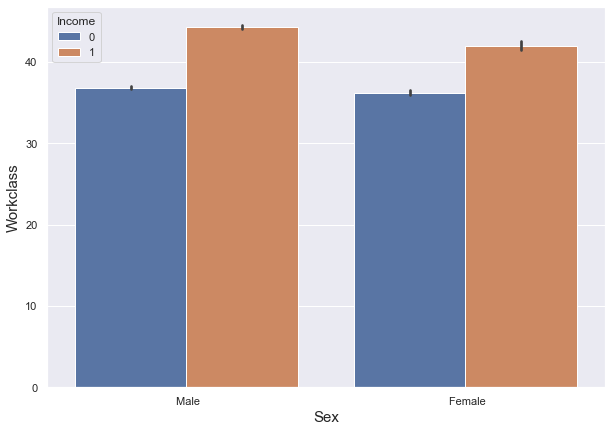

In [42]:
plt.figure(figsize=(10,7))
sns.barplot(data['Sex'],data['Age'], hue='Income', data= data)
plt.xlabel('Sex', fontsize= 15)
plt.ylabel('Workclass', fontsize= 15)
plt.show()

Here we can see for male and female both as age increases, the population count for income>=50K, also increases. 

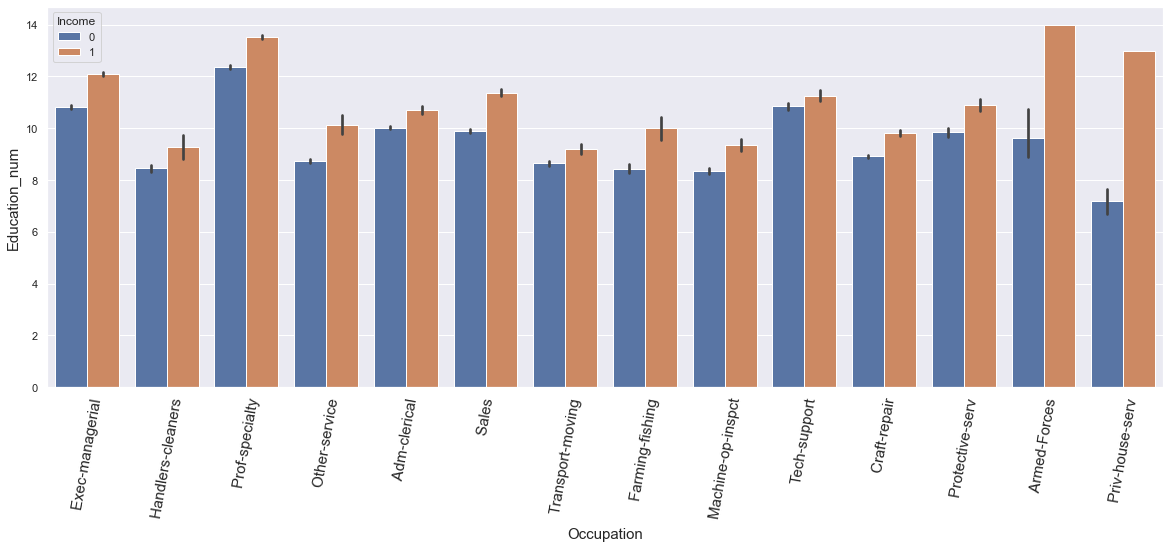

In [43]:
plt.figure(figsize=(20,7))
sns.barplot(data['Occupation'],data['Education_num'], hue='Income', data= data)
plt.xlabel('Occupation', fontsize= 15)
plt.ylabel('Education_num', fontsize= 15)
locs, labels = plt.xticks(fontsize= 15)
plt.setp(labels, rotation=80)
plt.show()

Here we can see With increase in the Education years, income also increase in same occupation.   
Population having same occupation, but due to Higher Education They are earning >=50K, in same occuaption.  

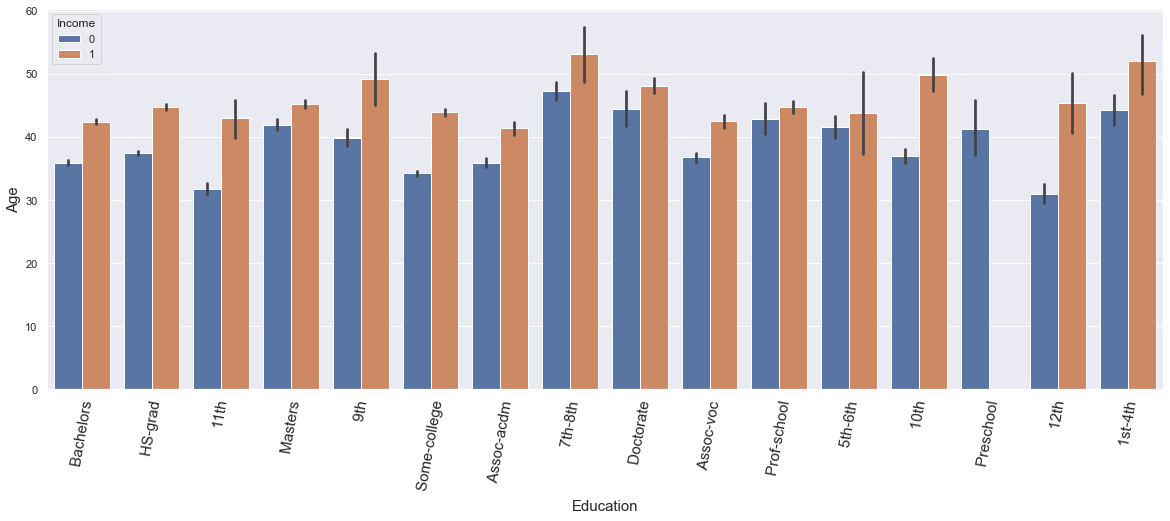

In [44]:
plt.figure(figsize=(20,7))
sns.barplot(data['Education'],data['Age'], hue='Income', data= data)
plt.xlabel('Education', fontsize= 15)
plt.ylabel('Age', fontsize= 15)
locs, labels = plt.xticks(fontsize= 15)
plt.setp(labels, rotation=80)
plt.show()

Here we can see Age is having considerable effect on Income  
With same eduaction background, pepole earning more due to their age diffrence, or indiractly we can say due to more experience.  


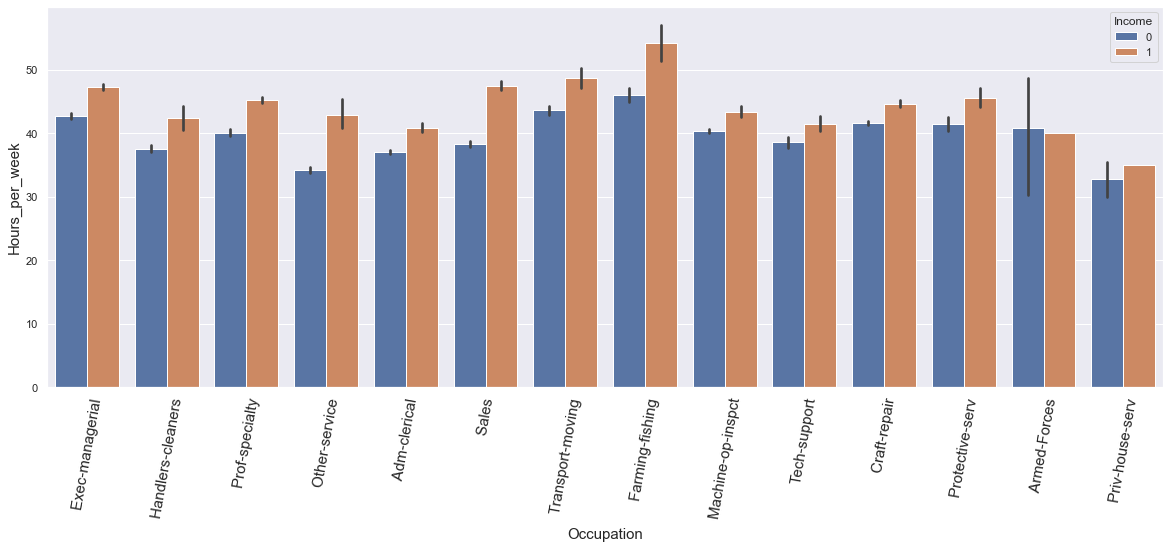

In [45]:
plt.figure(figsize=(20,7))
sns.barplot(data['Occupation'],data['Hours_per_week'], hue='Income', data= data)
plt.xlabel('Occupation', fontsize= 15)
plt.ylabel('Hours_per_week', fontsize= 15)
locs, labels = plt.xticks(fontsize= 15)
plt.setp(labels, rotation=80)
plt.show()

Here we can see for same occupation if a person workign extra per week. He is getting extra pay.  
Thats why as the workign hours increases , chance to get income >=50K is higher.  

### EDA SUMMARY

Workclass: Pepole workign in private sector having less change to have income>=50K, Chances for Self-emp=ic and Gov employee are High.  
Education:Education Increases the chance of getting income>=50K, Higher the education, higher the income.  
Marital_status:Married-civ-spouse Increases the chance of getting income>=50K, Higher the education, higher the income.  
Occupation: Occupation increase the chance of getting income>=50K.   
Relationship: For Husband, chance is good for getting income>=50K , but other relations not showing good relation.   
Race: Most of the pepole are White, so change of getting income>=50k, is higher, but other category are not showing good relation.   
Sex: For male Population chance of getting income>=50K ,is higher.  
Native_country: Native country is not having considrable effect, as most of the pepole are from US.  
Age: Age have considrable effect, We have seen as the age increses channce of getting income>=50K, also increases.   
Education_num: It also have considrable effect, We have seen as the Education_num increses channce of getting income>=50K, also increases.    
Capital_gain: No considerable effect.  
Capital_loss: No considrable effect  
Hours_per_week: More the working hours, higher the channce to get income>=50K.  

## Data Preprocessing

Lets first drop the Columns not relevent for Model Devlopment.  
We will drop Capital_gain, Capital_loss and Fnlwgt as they are not relevent. 

In [46]:
data.drop(['Fnlwgt','Capital_gain', 'Capital_loss'], axis=True, inplace= True)

In [47]:
data

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0
32556,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1
32557,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,0
32558,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,0


In [48]:
data.shape

(30161, 12)

In [49]:
feature=data.drop(['Income','Education'], axis=1)

In [50]:
target= data['Income']

In [51]:
pd.set_option('display.max_columns', None)

In [52]:
data_new= pd.get_dummies(feature,sparse=False, drop_first=True )

In [53]:
data_new

,Age,Education_num,Hours_per_week,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Male,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Holand-Netherlands,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,13,13,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,9,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,53,7,40,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,13,40,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,14,40,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,12,38,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32556,40,9,40,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,58,9,40,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,22,9,20,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_new['Education']=le.fit_transform(data['Education'])

In [55]:
data_new['Income']= target

In [56]:
data_new.head()

,Age,Education_num,Hours_per_week,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Male,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Holand-Netherlands,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia,Education,Income
0,50,13,13,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,9,0
1,38,9,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,11,0
2,53,7,40,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,28,13,40,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0
4,37,14,40,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,12,0


In [57]:
data_new.corr()

,Age,Education_num,Hours_per_week,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Male,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Holand-Netherlands,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia,Education,Income
Age,1.000000,0.043525,0.101599,0.068257,-0.210498,0.111040,0.150430,0.014804,0.015337,-0.015617,0.308333,0.015823,-0.524023,0.013093,0.246887,-0.010807,0.016109,0.111368,0.039446,-0.104207,-0.014959,-0.092834,0.018902,0.060614,0.005483,-0.029319,-0.018476,0.032397,-0.024021,-0.069314,-0.420621,0.049881,0.024574,-0.007020,-0.014101,-0.032347,0.026905,0.081992,0.013974,0.013743,0.002960,0.029878,-0.003610,-0.004543,-0.016326,0.011472,0.003307,0.006250,0.018350,-0.020987,0.000312,-0.002822,-0.006234,-0.009891,0.017306,-0.001528,0.003967,-0.004253,0.029125,-0.010357,0.001266,-0.005046,-0.057492,-0.013855,0.000453,-0.006177,0.007944,0.010583,0.001062,0.007836,0.000024,0.001923,-0.007879,-0.004940,0.007868,0.016259,-0.017775,0.000657,-0.001111,0.242000
Education_num,0.043525,1.000000,0.152528,0.097390,-0.165017,0.078852,0.010617,0.101217,-0.008872,0.000224,0.080775,-0.040616,-0.030206,-0.051794,-0.062045,-0.000068,-0.154524,0.201825,-0.108778,-0.138003,-0.170415,-0.181771,-0.078426,0.427064,0.003952,0.025498,0.058577,-0.125921,0.057271,-0.092848,-0.096880,-0.059195,0.033649,0.062030,-0.074329,-0.049516,0.052601,0.006131,0.012909,0.020769,-0.011413,-0.009231,-0.056098,-0.006640,-0.073312,0.021111,0.026402,0.025299,-0.004831,-0.072804,-0.018512,-0.000274,-0.011380,0.007616,0.005277,0.052222,0.034139,-0.000419,-0.025836,-0.006243,0.021437,-0.013729,-0.223524,-0.018879,0.001390,-0.008512,0.026303,0.000668,-0.043058,-0.042082,0.001816,0.017814,0.049132,0.008184,-0.017134,0.127199,-0.010952,-0.001660,0.345431,0.335317
Hours_per_week,0.101599,0.152528,1.000000,0.001611,-0.095542,0.126254,0.087835,-0.032976,-0.014781,0.007286,0.223622,-0.009971,-0.212807,-0.018285,-0.091231,-0.000382,0.044803,0.131571,0.093133,-0.055227,-0.004943,-0.182293,-0.046863,0.047379,0.023611,-0.005146,-0.021484,0.072791,0.007424,-0.051951,-0.263712,-0.043211,-0.060971,-0.006287,-0.060464,-0.006004,0.056405,0.231272,0.002716,-0.009064,-0.004638,-0.005555,0.005326,-0.001772,-0.018927,0.006898,0.013590,0.004504,0.008572,-0.006527,-0.011735,-0.000448,-0.005020,0.000034,-0.009214,0.002

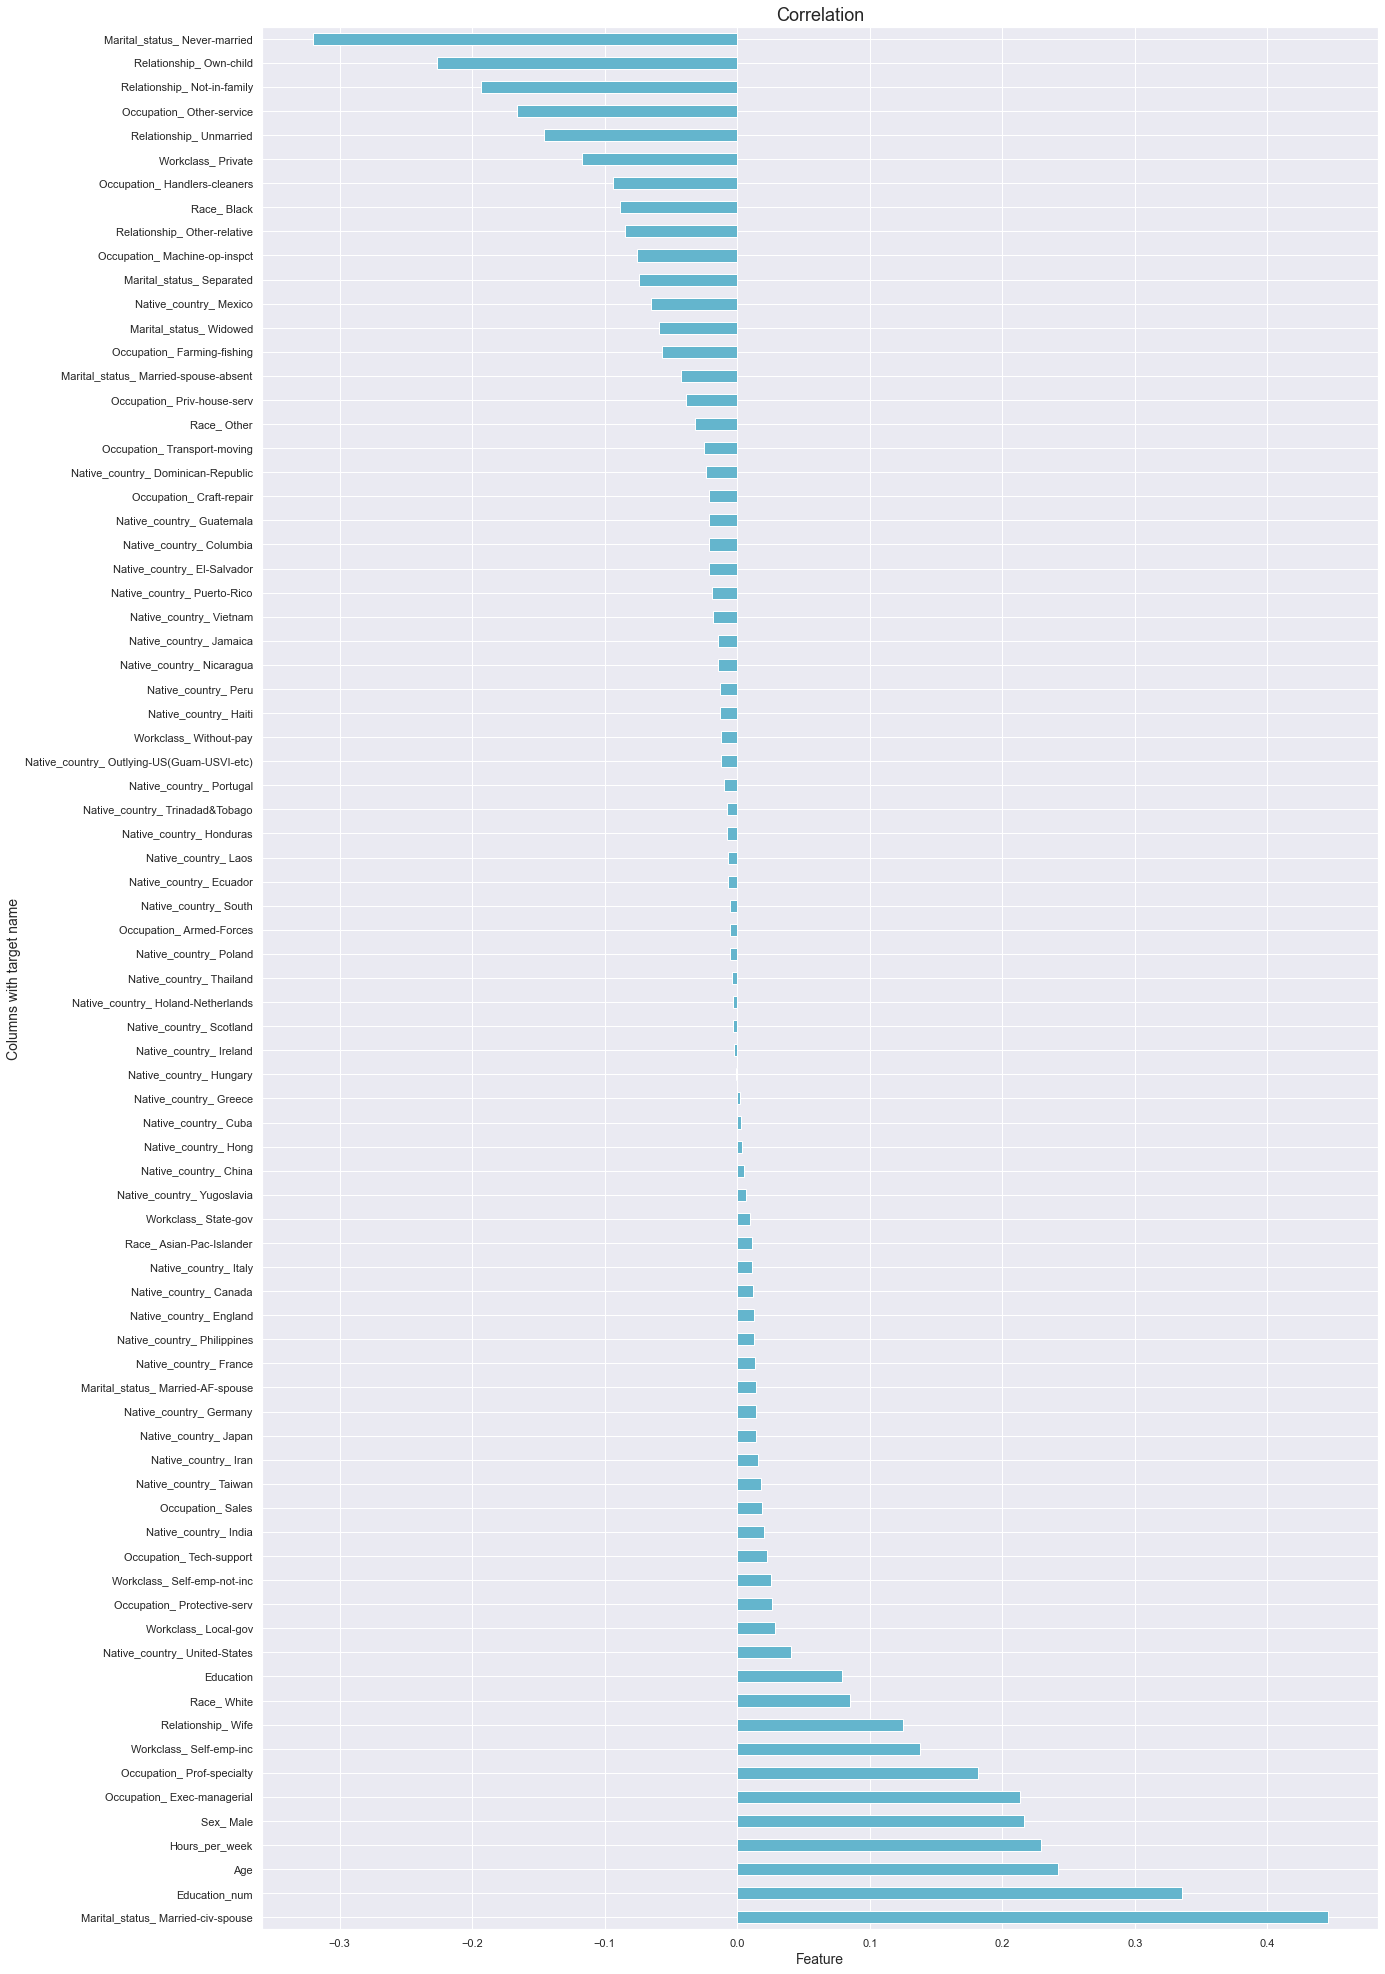

In [58]:
plt.figure(figsize=(20,35))
data_new.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='barh',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Here we can see in the graphs , Native country hungry having 0 correlation with the income,  
Columns on the left of 0.0  are positive correlated , on the other hand values on the left of the 0.0 are negative correlated.  

### Checkign outliers and skewness

Most of the columns are categorical, we will remove skewness from few columns only.

In [59]:
pd.set_option('display.max_rows', None)

In [60]:
data_new.skew()

Age                                             0.530223
Education_num                                  -0.305328
Hours_per_week                                  0.330856
Workclass_ Local-gov                            3.415613
Workclass_ Private                             -1.087863
Workclass_ Self-emp-inc                         5.012214
Workclass_ Self-emp-not-inc                     3.026628
Workclass_ State-gov                            4.543837
Workclass_ Without-pay                         46.385037
Marital_status_ Married-AF-spouse              37.860023
Marital_status_ Married-civ-spouse              0.134990
Marital_status_ Married-spouse-absent           8.862079
Marital_status_ Never-married                   0.759817
Marital_status_ Separated                       5.399572
Marital_status_ Widowed                         5.788083
Occupation_ Armed-Forces                       57.866705
Occupation_ Craft-repair                        2.153788
Occupation_ Exec-managerial    

Age, Education_num, Hours_per_week  are not having skewness we can proceed further.

## Scaling the data Using StandardScaler.

In [61]:
# Dividing into Feature and Target data
x=data_new.drop(['Income'],axis=1)
y=data_new['Income']

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
SDC=StandardScaler()
x=SDC.fit_transform(x)

<AxesSubplot:xlabel='Income', ylabel='count'>

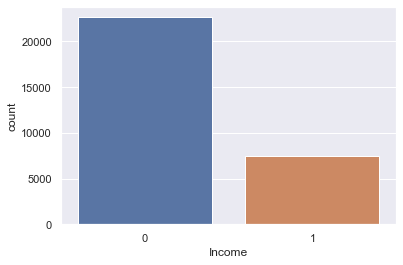

In [64]:
sns.countplot(y)

Here we can see our output is not balanced we will now use SMOTE to balance the output.

In [65]:
from imblearn.over_sampling import SMOTE

In [66]:
X_train_over, Y_train_over =SMOTE(k_neighbors=3).fit_resample(x,y)

In [67]:
X_train_over.shape

(45306, 79)

In [68]:
Y_train_over.value_counts()

0    22653
1    22653
Name: Income, dtype: int64

In [69]:
data_new.columns

Index(['Age', 'Education_num', 'Hours_per_week', 'Workclass_ Local-gov',
       'Workclass_ Private', 'Workclass_ Self-emp-inc',
       'Workclass_ Self-emp-not-inc', 'Workclass_ State-gov',
       'Workclass_ Without-pay', 'Marital_status_ Married-AF-spouse',
       'Marital_status_ Married-civ-spouse',
       'Marital_status_ Married-spouse-absent',
       'Marital_status_ Never-married', 'Marital_status_ Separated',
       'Marital_status_ Widowed', 'Occupation_ Armed-Forces',
       'Occupation_ Craft-repair', 'Occupation_ Exec-managerial',
       'Occupation_ Farming-fishing', 'Occupation_ Handlers-cleaners',
       'Occupation_ Machine-op-inspct', 'Occupation_ Other-service',
       'Occupation_ Priv-house-serv', 'Occupation_ Prof-specialty',
       'Occupation_ Protective-serv', 'Occupation_ Sales',
       'Occupation_ Tech-support', 'Occupation_ Transport-moving',
       'Relationship_ Not-in-family', 'Relationship_ Other-relative',
       'Relationship_ Own-child', 'Relationsh

In [70]:
dfx=pd.DataFrame(data=X_train_over, columns=['Age', 'Education_num', 'Hours_per_week', 'Workclass_ Local-gov',
       'Workclass_ Private', 'Workclass_ Self-emp-inc',
       'Workclass_ Self-emp-not-inc', 'Workclass_ State-gov',
       'Workclass_ Without-pay', 'Marital_status_ Married-AF-spouse',
       'Marital_status_ Married-civ-spouse',
       'Marital_status_ Married-spouse-absent',
       'Marital_status_ Never-married', 'Marital_status_ Separated',
       'Marital_status_ Widowed', 'Occupation_ Armed-Forces',
       'Occupation_ Craft-repair', 'Occupation_ Exec-managerial',
       'Occupation_ Farming-fishing', 'Occupation_ Handlers-cleaners',
       'Occupation_ Machine-op-inspct', 'Occupation_ Other-service',
       'Occupation_ Priv-house-serv', 'Occupation_ Prof-specialty',
       'Occupation_ Protective-serv', 'Occupation_ Sales',
       'Occupation_ Tech-support', 'Occupation_ Transport-moving',
       'Relationship_ Not-in-family', 'Relationship_ Other-relative',
       'Relationship_ Own-child', 'Relationship_ Unmarried',
       'Relationship_ Wife', 'Race_ Asian-Pac-Islander', 'Race_ Black',
       'Race_ Other', 'Race_ White', 'Sex_ Male', 'Native_country_ Canada',
       'Native_country_ China', 'Native_country_ Columbia',
       'Native_country_ Cuba', 'Native_country_ Dominican-Republic',
       'Native_country_ Ecuador', 'Native_country_ El-Salvador',
       'Native_country_ England', 'Native_country_ France',
       'Native_country_ Germany', 'Native_country_ Greece',
       'Native_country_ Guatemala', 'Native_country_ Haiti',
       'Native_country_ Holand-Netherlands', 'Native_country_ Honduras',
       'Native_country_ Hong', 'Native_country_ Hungary',
       'Native_country_ India', 'Native_country_ Iran',
       'Native_country_ Ireland', 'Native_country_ Italy',
       'Native_country_ Jamaica', 'Native_country_ Japan',
       'Native_country_ Laos', 'Native_country_ Mexico',
       'Native_country_ Nicaragua',
       'Native_country_ Outlying-US(Guam-USVI-etc)', 'Native_country_ Peru',
       'Native_country_ Philippines', 'Native_country_ Poland',
       'Native_country_ Portugal', 'Native_country_ Puerto-Rico',
       'Native_country_ Scotland', 'Native_country_ South',
       'Native_country_ Taiwan', 'Native_country_ Thailand',
       'Native_country_ Trinadad&Tobago', 'Native_country_ United-States',
       'Native_country_ Vietnam', 'Native_country_ Yugoslavia', 'Education'])

Here we can see over data is balance now.

### VIF calculation

In [71]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [73]:
calc_vif(dfx)

,variables,VIF FACTOR
0,Age,1.587236
1,Education_num,1.908834
2,Hours_per_week,1.261083
3,Workclass_ Local-gov,2.914229
4,Workclass_ Private,6.222318
5,Workclass_ Self-emp-inc,2.387041
6,Workclass_ Self-emp-not-inc,3.266556
7,Workclass_ State-gov,2.112505
8,Workclass_ Without-pay,1.012395
9,Marital_status_ Married-AF-spouse,1.172665


In [74]:
dfx.drop(['Native_country_ United-States'],axis=1, inplace= True)

In [75]:
calc_vif(dfx)

,variables,VIF FACTOR
0,Age,1.587227
1,Education_num,1.908610
2,Hours_per_week,1.261047
3,Workclass_ Local-gov,2.914224
4,Workclass_ Private,6.222274
5,Workclass_ Self-emp-inc,2.387029
6,Workclass_ Self-emp-not-inc,3.266545
7,Workclass_ State-gov,2.112493
8,Workclass_ Without-pay,1.012395
9,Marital_status_ Married-AF-spouse,1.172607


In [76]:
dfx.drop(['Relationship_ Not-in-family'],axis=1, inplace= True)

In [77]:
calc_vif(dfx)

,variables,VIF FACTOR
0,Age,1.585625
1,Education_num,1.908550
2,Hours_per_week,1.260810
3,Workclass_ Local-gov,2.914150
4,Workclass_ Private,6.222189
5,Workclass_ Self-emp-inc,2.386903
6,Workclass_ Self-emp-not-inc,3.266541
7,Workclass_ State-gov,2.112488
8,Workclass_ Without-pay,1.012146
9,Marital_status_ Married-AF-spouse,1.017794


In [78]:
dfx.drop(['Race_ White'],axis=1, inplace= True)

In [79]:
calc_vif(dfx)

,variables,VIF FACTOR
0,Age,1.585221
1,Education_num,1.906788
2,Hours_per_week,1.260808
3,Workclass_ Local-gov,2.914120
4,Workclass_ Private,6.220083
5,Workclass_ Self-emp-inc,2.386129
6,Workclass_ Self-emp-not-inc,3.265946
7,Workclass_ State-gov,2.112455
8,Workclass_ Without-pay,1.012134
9,Marital_status_ Married-AF-spouse,1.017764


As we can see VIF is less than 10 we will not remove any columns, and proceed further.

In [80]:
x=dfx
y=Y_train_over

## Model Design

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

## Chosing Best Random State

In [108]:
lr= LogisticRegression()
for i in range(0,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y, random_state= i, test_size= 0.20)
    lr.fit(x_train, y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)== round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random state ", i, "The Model performing Well")
        print("At Random State", i)
        print("Training Accuracy score is-",accuracy_score(y_train,pred_train)*100 )
        print("Testing Accuracy Score is-", accuracy_score(y_test,pred_test)*100)

At Random state  1 The Model performing Well
At Random State 1
Training Accuracy score is- 81.16929698708752
Testing Accuracy Score is- 81.16309865371882
At Random state  24 The Model performing Well
At Random State 24
Training Accuracy score is- 81.11411543979693
Testing Accuracy Score is- 81.06378282939748
At Random state  33 The Model performing Well
At Random State 33
Training Accuracy score is- 81.06721112459994
Testing Accuracy Score is- 81.07481792098874
At Random state  37 The Model performing Well
At Random State 37
Training Accuracy score is- 81.14170621344222
Testing Accuracy Score is- 81.10792319576252
At Random state  42 The Model performing Well
At Random State 42
Training Accuracy score is- 81.1472243681713
Testing Accuracy Score is- 81.1410284705363
At Random state  64 The Model performing Well
At Random State 64
Training Accuracy score is- 81.15274252290034
Testing Accuracy Score is- 81.17413374531009
At Random state  68 The Model performing Well
At Random State 68
Tra

At Random State 195  
Training Accuracy score is- 81.21620130228452  
Testing Accuracy Score is- 81.21827411167513  

In [109]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y,random_state=195,test_size=0.20)

In [110]:
lr.fit(x_train_b, y_train_b)
lr_pred=lr.predict(x_test_b)
print(accuracy_score(y_test_b,lr_pred))

0.8121827411167513


In [111]:
from sklearn.metrics import classification_report 
print(confusion_matrix(y_test_b, lr_pred))
print(classification_report(y_test_b, lr_pred))

[[3478 1002]
 [ 700 3882]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      4480
           1       0.79      0.85      0.82      4582

    accuracy                           0.81      9062
   macro avg       0.81      0.81      0.81      9062
weighted avg       0.81      0.81      0.81      9062



## Cross validation of model

In [112]:
lr_pred=lr.predict(x_test_b)
from sklearn.model_selection import cross_val_score
lr_score=accuracy_score(y_test_b,lr_pred)
for j in range(2,10):
    lr_cv= cross_val_score(lr,x,y,cv=j, scoring='accuracy')
    lr_cvscore=lr_cv.mean()
    print("at cv:-", j)
    print("Cross Validation scre is:-",lr_cvscore*100)
    print("Accuracy Score:-", lr_score*100)
    print("\n")

at cv:- 2
Cross Validation scre is:- 80.96940802542709
Accuracy Score:- 81.21827411167513


at cv:- 3
Cross Validation scre is:- 81.04666048646978
Accuracy Score:- 81.21827411167513


at cv:- 4
Cross Validation scre is:- 81.02902037999931
Accuracy Score:- 81.21827411167513


at cv:- 5
Cross Validation scre is:- 81.0555003604764
Accuracy Score:- 81.21827411167513


at cv:- 6
Cross Validation scre is:- 81.05769655233304
Accuracy Score:- 81.21827411167513


at cv:- 7
Cross Validation scre is:- 81.02902290526188
Accuracy Score:- 81.21827411167513


at cv:- 8
Cross Validation scre is:- 81.03564886140184
Accuracy Score:- 81.21827411167513


at cv:- 9
Cross Validation scre is:- 81.07314704454156
Accuracy Score:- 81.21827411167513




#### At cv:- 9

Cross Validation scre is:- 81.07314704454156  
Accuracy Score:- 81.21827411167513  

At cv-9 Cross val score and  Accuracy Score are having very less diffrence, 
Model is perfoming well. 

## SVC

In [113]:
svc=SVC()
svc.fit(x_train_b, y_train_b)
svc.score(x_train_b, y_train_b)
svc_pred=svc.predict(x_test_b)

svc_d=accuracy_score(y_test_b, svc_pred)
print('Accuracy_core:', svc_d*100)

svc_cv= cross_val_score(svc,x,y,cv=9, scoring='accuracy')
svc_score=svc_cv.mean()
print('Cross val Score :', svc_score*100)

Accuracy_core: 82.3879938203487
Cross val Score : 81.94720346091026


In [114]:
print(confusion_matrix(y_test_b, svc_pred))
print(classification_report(y_test_b, svc_pred))

[[3481  999]
 [ 597 3985]]
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      4480
           1       0.80      0.87      0.83      4582

    accuracy                           0.82      9062
   macro avg       0.83      0.82      0.82      9062
weighted avg       0.83      0.82      0.82      9062



Accuracy_core: 82.3879938203487  
Cross val Score : 81.94720346091026   
Both score having good Accuracy , but the diffrence if slightly high as compare to Logistic model.  
Lets try another model. 

## Ensemble Techniques

## KNeighborsClassifier

In [115]:
kn=KNeighborsClassifier()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= accuracy_score(y_test_b, kn_pred)
print('accuracy_score:', kn_score*100)

kncvscore=cross_val_score(kn,x,y, cv=9, scoring='accuracy')
kncv_score=kncvscore.mean()
print('Cross val Score :',kncv_score*100 )

accuracy_score: 83.24873096446701
Cross val Score : 83.69531629364765


In [117]:
print(confusion_matrix(y_test_b, kn_pred))
print(classification_report(y_test_b, kn_pred))

[[3461 1019]
 [ 499 4083]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      4480
           1       0.80      0.89      0.84      4582

    accuracy                           0.83      9062
   macro avg       0.84      0.83      0.83      9062
weighted avg       0.84      0.83      0.83      9062



accuracy_score: 83.24873096446701  
Cross val Score : 83.69531629364765    
Both score having good Accuracy and diffrence in the also very less. we can consider this model as best model, but lets try more.  

### DecisionTreeClassifier

In [118]:
dt=DecisionTreeClassifier()
dt.fit(x_train_b,y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score= accuracy_score(y_test_b, dt_pred)
print("accuracy_score", dt_score*100)

dt_cv=cross_val_score(dt,x,y,cv=9, scoring='accuracy')
dtcv_score= dt_cv.mean()
print("Cross val score is:",dtcv_score*100 )

accuracy_score 83.46943279629221
Cross val score is: 83.45914448417429


In [119]:
print(confusion_matrix(y_test_b, dt_pred))
print(classification_report(y_test_b, dt_pred))

[[3732  748]
 [ 750 3832]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      4480
           1       0.84      0.84      0.84      4582

    accuracy                           0.83      9062
   macro avg       0.83      0.83      0.83      9062
weighted avg       0.83      0.83      0.83      9062



Accuracy_score 83.46943279629221  
Cross val score is: 83.45914448417429  
Both score having good Accuracy, But the diffrence is also very low, we can say negligible.

DecisionTreeClassifier is better now from other model.  

### RandomForestClassifier

In [120]:
rf=RandomForestClassifier()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=9, scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  86.51511807548002
Cross val Score : 86.76775702997396


In [103]:
print(confusion_matrix(y_test_b, rf_pred))
print(classification_report(y_test_b, rf_pred))

[[3841  639]
 [ 595 3987]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4480
           1       0.86      0.87      0.87      4582

    accuracy                           0.86      9062
   macro avg       0.86      0.86      0.86      9062
weighted avg       0.86      0.86      0.86      9062



accuracy_score:  86.51511807548002   
Cross val Score : 86.76775702997396   
Both score having very good Accuracy,and  the diffrence is slightly high as compares to DecisionTreeClassifier  
DecisionTreeClassifier is still best.   

### AdaBoostClassifier

In [121]:
ad=AdaBoostClassifier()
ad.fit(x_train_b, y_train_b)
ad.score(x_train_b,y_train_b)
ad_pred=ad.predict(x_test_b)

ad_score= accuracy_score(y_test_b, ad_pred)
print('accuracy_score: ', ad_score*100)

adcvscore=cross_val_score(ad,x,y, cv=7, scoring='accuracy')
adcv_score=adcvscore.mean()
print('Cross val Score :',adcv_score*100 )

accuracy_score:  83.3039064224233
Cross val Score : 83.17232764829056


In [122]:
print(confusion_matrix(y_test_b, ad_pred))
print(classification_report(y_test_b, ad_pred))

[[3523  957]
 [ 556 4026]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      4480
           1       0.81      0.88      0.84      4582

    accuracy                           0.83      9062
   macro avg       0.84      0.83      0.83      9062
weighted avg       0.84      0.83      0.83      9062



accuracy_score:  83.3039064224233   
Cross val Score : 83.17232764829056    
Both score having good Accuracy,and the diffrence is slightly High as compares to DecisionTreeClassifier.   
DecisionTreeClassifier is still best.  

## GaussianNB

In [123]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b, y_train_b)
gb_pred=gb.predict(x_test_b)

gb_score=accuracy_score(y_test_b, gb_pred)
print("Accuracy Score is:", gb_score*100)

gb_cv= cross_val_score(gb, x,y,cv=7, scoring='accuracy')
gb_cvscore=gb_cv.mean()
print("Cross Val Score is :", gb_cvscore*100)

Accuracy Score is: 65.42705804458177
Cross Val Score is : 65.71318134287363


In [124]:
print(confusion_matrix(y_test_b, gb_pred))
print(classification_report(y_test_b, gb_pred))

[[1490 2990]
 [ 143 4439]]
              precision    recall  f1-score   support

           0       0.91      0.33      0.49      4480
           1       0.60      0.97      0.74      4582

    accuracy                           0.65      9062
   macro avg       0.75      0.65      0.61      9062
weighted avg       0.75      0.65      0.61      9062



Accuracy Score is: 65.26153167071287   
Cross Val Score is : 65.50787975102635  
Both score having good Accuracy,and the diffrence is also low. But score less as comepare  to KNeighborsClassifier.    
KNeighborsClassifier is still best.  

### Hyperparameter Tuning of the model.

In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters= {'criterion':['gini', 'entropy'],'splitter':['best','random'],'max_features':['auto','sqrt','log2'], 'min_samples_leaf':list(range(0,5))}
dt=DecisionTreeClassifier()
dtclf=GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dtclf.fit (x_train_b, y_train_b)
print(dtclf.best_params_)  

{'criterion': 'gini', 'max_features': 'log2', 'min_samples_leaf': 1, 'splitter': 'best'}


In [133]:
dt=DecisionTreeClassifier(criterion='gini', max_features='log2', splitter= 'best', min_samples_leaf=1)
dt.fit(x_train_b,y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score= accuracy_score(y_test_b, dt_pred)
print("accuracy_score", dt_score*100)

dt_cv=cross_val_score(dt,x,y,cv=9, scoring='accuracy')
dtcv_score= dt_cv.mean()
print("Cross val score is:",dtcv_score*100 )

accuracy_score 83.75634517766497
Cross val score is: 83.94473138215689


In [134]:
from sklearn.ensemble import RandomForestClassifier

parameters={'n_estimators' : [50,100,125,150,175,200],'criterion':['gini', 'entropy'],'max_features':['auto','sqrt', 'log2'], 'random_state':[10,20,30,40,50]}
rf=RandomForestClassifier()
rfclf=GridSearchCV(rf, param_grid=parameters, n_jobs=-1)
rfclf.fit(x_train_b, y_train_b)
print(rfclf.best_params_)

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 175, 'random_state': 30}


In [136]:
rf=RandomForestClassifier(criterion='entropy', max_features='auto', n_estimators=175, random_state=50)
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=9, scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  86.44890752593246
Cross val Score : 86.83618063832603


In [137]:
from sklearn.ensemble import AdaBoostClassifier
parameters={'n_estimators':[20,30,40,50,100],'learning_rate':[0.0001,0.001,0.01],'algorithm':['SAMME', 'SAMME.R'],'random_state':[10,20,30,40,50]}
ad=AdaBoostClassifier()
adclf=GridSearchCV(ad, param_grid=parameters, n_jobs=-1)
adclf.fit(x_train_b, y_train_b)
print(adclf.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 100, 'random_state': 10}


In [138]:
ad=AdaBoostClassifier(algorithm='SAMME.R', learning_rate= 0.01, n_estimators= 100, random_state=10)
ad.fit(x_train_b, y_train_b)
ad.score(x_train_b,y_train_b)
ad_pred=ad.predict(x_test_b)

ad_score= accuracy_score(y_test_b, ad_pred)
print('accuracy_score: ', ad_score*100)

adcvscore=cross_val_score(ad,x,y, cv=9, scoring='accuracy')
adcv_score=adcvscore.mean()
print('Cross val Score :',adcv_score*100 )

accuracy_score:  77.54358861178548
Cross val Score : 77.25025382951486


##### DecisionTreeClassifier with accuracy_score 83.7563 and Cross val score is: 83.9447 is our best model. 

### AUC ROC Curve:

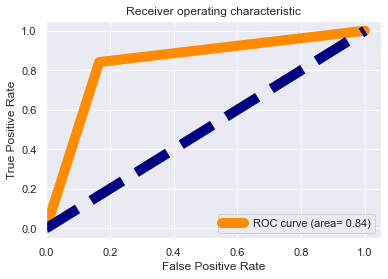

In [139]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(dt_pred, y_test_b)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color='darkorange', lw=10,label='ROC curve (area= %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color ='navy', lw=10, linestyle= '--')
plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Saving Best Model

In [140]:
import pickle
filename="Evaluation_Project- Census_Income_Project.pkl "
pickle.dump(dt, open(filename,'wb'))

In [141]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(dt.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,0,0
1,0,0
2,0,1
3,1,1
4,0,0
5,1,1
6,1,1
7,0,0
8,1,1
9,1,0
